In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from src.util import debye_spectral_density
from src.util import operators

# 1.) HOPS

In [2]:
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear

In [3]:
sigma_x, sigma_z, eye = operators.generate_physical_operators()
duration = 50

## Linear  vs non-linear HOPS

In [4]:
psis_linear_100 = np.array([np.load("simple_hops_linear_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_linear_1000 = np.array([np.load("simple_hops_linear_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_linear_10000 = np.array([np.load("simple_hops_linear_10000/data/psi"+str(i)+".npy") for i in range(10000)])
psis_nonlinear_100 = np.array([np.load("simple_hops_nonlinear_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_nonlinear_1000 = np.array([np.load("simple_hops_nonlinear_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_nonlinear_10000 = np.array([np.load("simple_hops_nonlinear_10000/data/psi"+str(i)+".npy") for i in range(10000)])

In [5]:
sigma_zs_linear_100 = compute_exp_val_linear(psis_linear_100, sigma_z)
sigma_zs_linear_1000 = compute_exp_val_linear(psis_linear_1000, sigma_z)
sigma_zs_linear_10000 = compute_exp_val_linear(psis_linear_10000, sigma_z)
sigma_zs_nonlinear_100 = compute_exp_val_nonlinear(psis_nonlinear_100, sigma_z)
sigma_zs_nonlinear_1000 = compute_exp_val_nonlinear(psis_nonlinear_1000, sigma_z)
sigma_zs_nonlinear_10000 = compute_exp_val_nonlinear(psis_nonlinear_10000, sigma_z)

In [6]:
ts = np.linspace(0, 50, 1000)

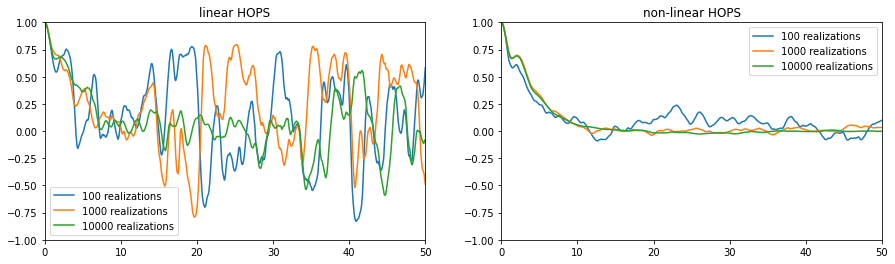

In [7]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(ts, sigma_zs_linear_100, label="100 realizations")
axarray[0].plot(ts, sigma_zs_linear_1000, label="1000 realizations")
axarray[0].plot(ts, sigma_zs_linear_10000, label="10000 realizations")
axarray[0].legend()
axarray[0].set_xlim(0, 50)
axarray[0].set_ylim(-1, 1)
axarray[0].set_title("linear HOPS")
axarray[1].plot(ts, sigma_zs_nonlinear_100, label="100 realizations")
axarray[1].plot(ts, sigma_zs_nonlinear_1000, label="1000 realizations")
axarray[1].plot(ts, sigma_zs_nonlinear_10000, label="10000 realizations")
axarray[1].legend()
axarray[1].set_xlim(0, 50)
axarray[1].set_ylim(-1, 1)
axarray[1].set_title("non-linear HOPS")
plt.show()

In [8]:
ts = np.linspace(0, duration, 1000)
with open("final/simple_hops_linear_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_linear_100[i])
        line += " " + str(sigma_zs_linear_1000[i])
        line += " " + str(sigma_zs_linear_10000[i]) + "\n"
        file.write(line)
        
with open("final/simple_hops_nonlinear_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_nonlinear_100[i])
        line += " " + str(sigma_zs_nonlinear_1000[i])
        line += " " + str(sigma_zs_nonlinear_10000[i]) + "\n"
        file.write(line)

## Magnitudes of the states from linear HOPS

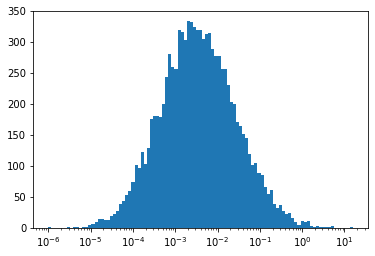

In [9]:
magnitudes = []
for i in range(10000):
    # take the final state of each sample
    magnitudes.append(np.linalg.norm(psis_linear_10000[i, -1, :]))
    
lowest = np.min(magnitudes)
largest = np.max(magnitudes)
bins = np.logspace(np.log10(lowest), np.log10(largest+1), 100)

plt.hist(magnitudes, bins=bins)
plt.xscale("log")
plt.show()

In [10]:
counts = np.zeros(bins.shape, dtype=int)
for magnitude in magnitudes:
    for i, b in enumerate(bins):
        if magnitude <= b:
            counts[i] += 1
            break

In [11]:
with open("final/simple_hops_linear_magnitudes.txt", "w+") as file:
    file.write("magnitude count\n")
    for i, count in enumerate(counts):
        file.write(str(bins[i]) + " " + str(count) + "\n")

## Non-linear HOPS: Convergence in N_trunc

In [12]:
N_trunc_list = [2, 4, 8, 16]

In [13]:
psis_100_list = []
sigma_zs_list = []
for i, N_trunc in enumerate(N_trunc_list):
    psis = np.array([np.load("simple_hops_nonlinear_convergence_N_trunc/data/psi_N_trunc_"+str(N_trunc)+"_"+str(i)+".npy") for i in range(10000)])
    psis_100_list.append(psis)
    sigma_zs_list.append(compute_exp_val_nonlinear(psis, sigma_z))

In [14]:
ts = np.linspace(0, 50, 1000)

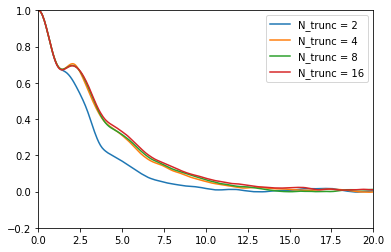

In [15]:
for i, N_trunc in enumerate(N_trunc_list):
    plt.plot(ts[:400], sigma_zs_list[i][:400], label="N_trunc = "+str(N_trunc))
plt.legend()
plt.xlim(0, 20)
plt.ylim(-0.2, 1)
plt.show()

In [16]:
with open("final/simple_hops_nonlinear_N_trunc_convergence.txt", "w+") as file:
    line = "t"
    for N_trunc in N_trunc_list:
        line += " sigma_z_N_trunc_" + str(N_trunc)
    file.write(line + "\n")
    for i, t in enumerate(ts):
        line = str(t)
        for j in range(len(N_trunc_list)):
            line += " " + str(sigma_zs_list[j][i])
        file.write(line + "\n")

## Generation of the stochastic processes

In [17]:
from src.util import bath_correlation_function

In [18]:
g = np.array([2])
w = np.array([0.5+2j])
t_start = 0
t_stop = 10
N_steps = 500
taus = np.linspace(t_start, t_stop, N_steps)
alphas = bath_correlation_function.alpha(taus, g, w)
N_samples_list = [100, 1000, 10000, 100000]

In [19]:
noise = []
z_t_Re = []
z_t_Im = []
z_t_z_0_Re = []
z_t_z_0_Im = []
z_t_z_0_c_Re = []
z_t_z_0_c_Im = []
alpha_Re = []
alpha_Im = []
for N_samples in N_samples_list:
    noise.append(np.load("stochastic_processes/data/noise_"+str(N_samples)+".npy"))
    mean = np.mean(noise[-1], axis=0)
    z_t_Re.append(np.real(mean))
    z_t_Im.append(np.imag(mean))
    noise_zero = noise[-1][:, 0]
    cov = np.mean(noise[-1]*noise_zero[:, np.newaxis], axis=0)
    z_t_z_0_Re.append(np.real(cov))
    z_t_z_0_Im.append(np.imag(cov))
    cov_c = np.mean(noise[-1]*np.conj(noise_zero)[:, np.newaxis], axis=0)
    z_t_z_0_c_Re.append(np.real(cov_c))
    z_t_z_0_c_Im.append(np.imag(cov_c))

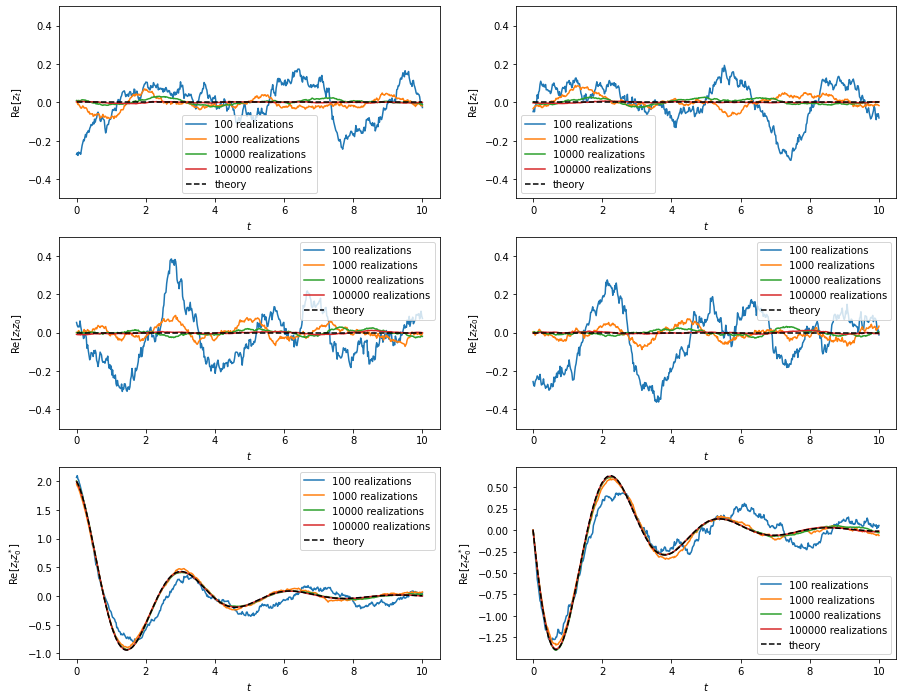

In [20]:
figure, axarray = plt.subplots(3, 2, figsize=(15, 12))
# mean
for i, N_samples in enumerate(N_samples_list):
    axarray[0, 0].plot(taus, z_t_Re[i], label=str(N_samples) + " realizations")
    axarray[0, 1].plot(taus, z_t_Im[i], label=str(N_samples) + " realizations")
axarray[0, 0].plot([t_start, t_stop], [0, 0], "--", label="theory", color="black")
axarray[0, 0].set_xlabel(r"$t$")
axarray[0, 0].set_ylabel(r"Re[$z_t$]")
axarray[0, 0].set_ylim(-0.5, 0.5)
axarray[0, 0].legend()
axarray[0, 1].plot([t_start, t_stop], [0, 0], "--", label="theory", color="black")
axarray[0, 1].set_xlabel(r"$t$")
axarray[0, 1].set_ylabel(r"Re[$z_t$]")
axarray[0, 1].set_ylim(-0.5, 0.5)
axarray[0, 1].legend()
# covariance
for i, N_samples in enumerate(N_samples_list):
    axarray[1, 0].plot(taus, z_t_z_0_Re[i], label=str(N_samples) + " realizations")
    axarray[1, 1].plot(taus, z_t_z_0_Im[i], label=str(N_samples) + " realizations")
axarray[1, 0].plot([t_start, t_stop], [0, 0], "--", label="theory", color="black")
axarray[1, 0].set_xlabel(r"$t$")
axarray[1, 0].set_ylabel(r"Re[$z_tz_0$]")
axarray[1, 0].set_ylim(-0.5, 0.5)
axarray[1, 0].legend()
axarray[1, 1].plot([t_start, t_stop], [0, 0], "--", label="theory", color="black")
axarray[1, 1].set_xlabel(r"$t$")
axarray[1, 1].set_ylabel(r"Re[$z_tz_0$]")
axarray[1, 1].set_ylim(-0.5, 0.5)
axarray[1, 1].legend()
# complex covariance
for i, N_samples in enumerate(N_samples_list):
    axarray[2, 0].plot(taus, z_t_z_0_c_Re[i], label=str(N_samples) + " realizations")
    axarray[2, 1].plot(taus, z_t_z_0_c_Im[i], label=str(N_samples) + " realizations")
axarray[2, 0].plot(taus, np.real(alphas), "--", label="theory", color="black")
axarray[2, 0].set_xlabel(r"$t$")
axarray[2, 0].set_ylabel(r"Re[$z_tz_0^*$]")
axarray[2, 0].legend()
axarray[2, 1].plot(taus, np.imag(alphas), "--", label="theory", color="black")
axarray[2, 1].set_xlabel(r"$t$")
axarray[2, 1].set_ylabel(r"Re[$z_tz_0^*$]")
axarray[2, 1].legend()
plt.show()

In [21]:
for n, N_samples in enumerate(N_samples_list):
    with open("final/stochastic_processes_"+str(N_samples)+".txt", "w+") as file:
        file.write("t z_t_Re z_t_Im z_t_z_0_Re z_t_z_0_Im z_t_z_0_c_Re z_t_z_0_c_Im zeros alpha_Re alpha_Im\n")
        for i, tau in enumerate(taus):
            line = str(tau)
            line += " " + str(z_t_Re[n][i])
            line += " " + str(z_t_Im[n][i])
            line += " " + str(z_t_z_0_Re[n][i])
            line += " " + str(z_t_z_0_Im[n][i])
            line += " " + str(z_t_z_0_c_Re[n][i])
            line += " " + str(z_t_z_0_c_Im[n][i])
            line += " " + str(0)
            line += " " + str(np.real(alphas[i]))
            line += " " + str(np.imag(alphas[i])) + "\n"
            file.write(line)

# 2.) HOMPS, high temperature

## Convergence of the BCF

In [22]:
taus = np.load("high_T_BCF/data/taus.npy")
alphas = np.load("high_T_BCF/data/alphas.npy")
alphas_compare = np.load("high_T_BCF/data/alphas_compare.npy")

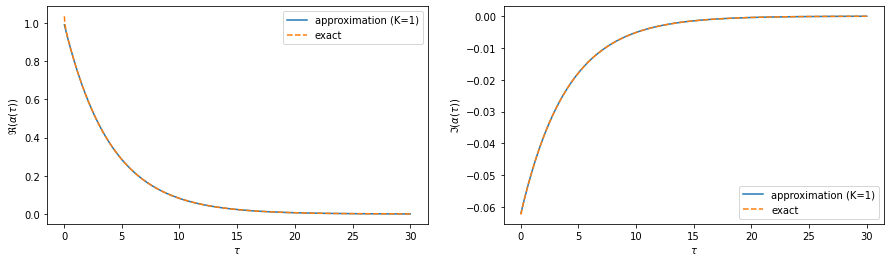

In [23]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(taus, np.real(alphas), label="approximation (K=1)")
axarray[0].plot(taus, np.real(alphas_compare), "--", label="exact")
axarray[0].legend()
axarray[0].set_xlabel(r"$\tau$")
axarray[0].set_ylabel(r"$\Re(\alpha(\tau))$")
axarray[1].plot(taus, np.imag(alphas), label="approximation (K=1)")
axarray[1].plot(taus, np.imag(alphas_compare), "--", label="exact")
axarray[1].legend()
axarray[1].set_xlabel(r"$\tau$")
axarray[1].set_ylabel(r"$\Im(\alpha(\tau))$")
plt.show()

In [24]:
with open("final/high_T_BCF.txt", "w+") as file:
    file.write("tau alpha_compare_Re alpha_compare_Im alpha_1_Re alpha_1_Im\n")
    for i, tau in enumerate(taus):
        line = str(tau)
        line += " " + str(np.real(alphas_compare[i]))
        line += " " + str(np.imag(alphas_compare[i]))
        line += " " + str(np.real(alphas[i]))
        line += " " + str(np.imag(alphas[i])) + "\n"
        file.write(line)

## Compare different Methods

In [25]:
psis_hops = [np.load(f"homps_high_T_different_methods/data/HOPS/psi{i}.npy") for i in range(10000)]
psis_homps_RK4 = [np.load(f"homps_high_T_different_methods/data/HOMPS_RK4/psi{i}.npy") for i in range(10000)]
psis_homps_TDVP2 = [np.load(f"homps_high_T_different_methods/data/HOMPS_TDVP/psi{i}.npy") for i in range(10000)]

In [26]:
sigma_zs_hops = compute_exp_val_nonlinear(np.array(psis_hops), sigma_z)
sigma_zs_homps_RK4 = compute_exp_val_nonlinear(np.array(psis_homps_RK4), sigma_z)
sigma_zs_homps_TDVP2 = compute_exp_val_nonlinear(np.array(psis_homps_TDVP2), sigma_z)

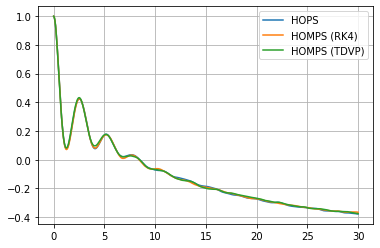

In [27]:
plt.plot(np.linspace(0, 30, 500), sigma_zs_hops, label="HOPS")
plt.plot(np.linspace(0, 30, 500), sigma_zs_homps_RK4, label="HOMPS (RK4)")
plt.plot(np.linspace(0, 30, 500), sigma_zs_homps_TDVP2, label="HOMPS (TDVP)")
plt.grid()
plt.legend()
plt.show()

In [28]:
with open("final/high_T_comparing_methods.txt", "w+") as file:
    file.write("t sigma_z_hops sigma_z_homps_RK4 sigma_z_homps_TDVP\n")
    ts = np.linspace(0, 30, 500)
    for i, t in enumerate(ts):
        line = str(ts[i])
        line += " " + str(sigma_zs_hops[i])
        line += " " + str(sigma_zs_homps_RK4[i])
        line += " " + str(sigma_zs_homps_TDVP2[i]) + "\n"
        file.write(line)

## Full runs

In [29]:
psis_100 = np.array([np.load("homps_high_T_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_1000 = np.array([np.load("homps_high_T_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_10000 = np.array([np.load("homps_high_T_10000/data/psi"+str(i)+".npy") for i in range(10000)])

In [30]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)
sigma_zs_1000 = compute_exp_val_nonlinear(psis_1000, sigma_z)
sigma_zs_10000 = compute_exp_val_nonlinear(psis_10000, sigma_z)

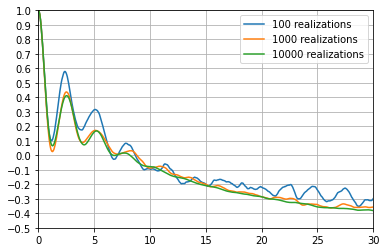

In [31]:
plt.plot(np.linspace(0, 30, 500), sigma_zs_100, label="100 realizations")
plt.plot(np.linspace(0, 30, 500), sigma_zs_1000, label="1000 realizations")
plt.plot(np.linspace(0, 30, 500), sigma_zs_10000, label="10000 realizations")
plt.grid()
plt.yticks(np.linspace(-0.5, 1, 16))
plt.legend()
plt.xlim(0, 30)
plt.ylim(-.5, 1)
plt.show()

In [32]:
with open("final/homps_high_T_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    ts = np.linspace(0, 30, 500)
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_100[i])
        line += " " + str(sigma_zs_1000[i])
        line += " " + str(sigma_zs_10000[i]) + "\n"
        file.write(line)

## Convergence of N_trunc

In [33]:
N_trunc_list = [10, 20, 30, 40]
sigma_zs = []
for N_trunc in N_trunc_list:
    print("loading N_trunc =", N_trunc, "...")
    psis = np.array([np.load("homps_high_T_N_trunc_convergence/data/N_trunc_"+str(N_trunc)+"/psi"+str(i)+".npy") for i in range(10000)])
    sigma_zs.append(compute_exp_val_nonlinear(psis, sigma_z))

loading N_trunc = 10 ...
loading N_trunc = 20 ...
loading N_trunc = 30 ...
loading N_trunc = 40 ...


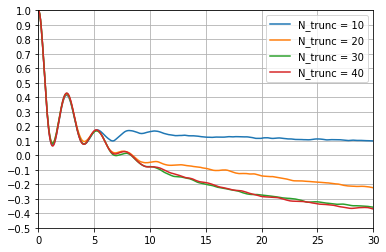

In [34]:
for i, N_trunc in enumerate(N_trunc_list):
    plt.plot(np.linspace(0, 30, 500), sigma_zs[i], label="N_trunc = "+str(N_trunc))
plt.grid()
plt.yticks(np.linspace(-0.5, 1, 16))
plt.legend()
plt.xlim(0, 30)
plt.ylim(-.5, 1)
plt.show()

In [35]:
with open("final/homps_high_T_N_trunc_convergence.txt", "w+") as file:
    file.write("t sigma_z_10 sigma_z_20 sigma_z_30 sigma_z_40\n")
    ts = np.linspace(0, 30, 500)
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs[0][i])
        line += " " + str(sigma_zs[1][i])
        line += " " + str(sigma_zs[2][i])
        line += " " + str(sigma_zs[3][i]) + "\n"
        file.write(line)

# 3.) HOMPS, low temperature

## Convergence of the BCF

In [36]:
taus = np.load("low_T_BCF/data/taus.npy")
alphas_compare = np.load("low_T_BCF/data/alphas_compare.npy")
alphas_matsubara = np.load("low_T_BCF/data/alphas_matsubara.npy")
alphas_pade = np.load("low_T_BCF/data/alphas_pade.npy")

In [37]:
N_terms_matsubara = [50, 100, 1000]
N_terms_pade = [5, 13, 30]

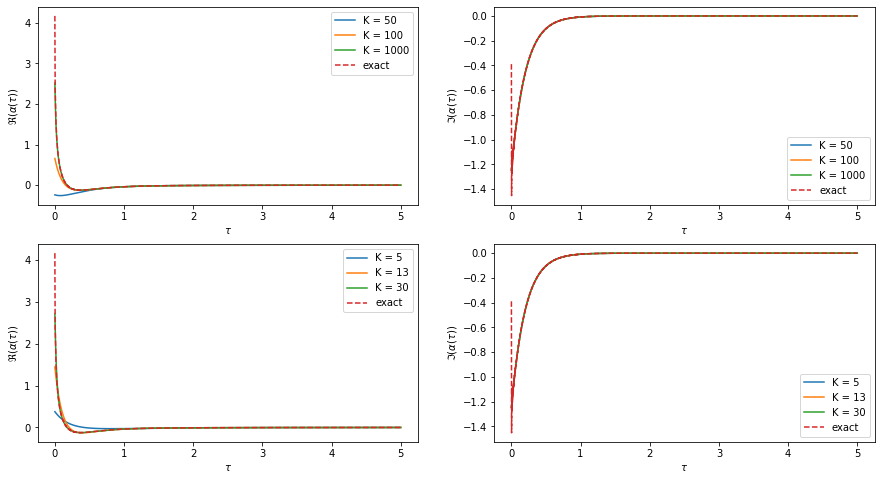

In [38]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
for i, N_terms in enumerate(N_terms_matsubara):
    axarray[0][0].plot(taus, np.real(alphas_matsubara[i]), label="K = "+str(N_terms))
axarray[0][0].plot(taus, np.real(alphas_compare), "--", label="exact")
axarray[0][0].legend()
axarray[0][0].set_xlabel(r"$\tau$")
axarray[0][0].set_ylabel(r"$\Re(\alpha(\tau))$")
#axarray[0][0].set_xlim(0, 2)
#axarray[0][0].set_ylim(-1, 1)
for i, N_terms in enumerate(N_terms_matsubara):
    axarray[0][1].plot(taus, np.imag(alphas_matsubara[i]), label="K = "+str(N_terms))
axarray[0][1].plot(taus, np.imag(alphas_compare), "--", label="exact")
axarray[0][1].legend()
axarray[0][1].set_xlabel(r"$\tau$")
axarray[0][1].set_ylabel(r"$\Im(\alpha(\tau))$")
for i, N_terms in enumerate(N_terms_pade):
    axarray[1][0].plot(taus, np.real(alphas_pade[i]), label="K = "+str(N_terms))
axarray[1][0].plot(taus, np.real(alphas_compare), "--", label="exact")
axarray[1][0].legend()
axarray[1][0].set_xlabel(r"$\tau$")
axarray[1][0].set_ylabel(r"$\Re(\alpha(\tau))$")
#axarray[1][0].set_xlim(0, 2)
#axarray[1][0].set_ylim(-1, 1)
for i, N_terms in enumerate(N_terms_pade):
    axarray[1][1].plot(taus, np.imag(alphas_pade[i]), label="K = "+str(N_terms))
axarray[1][1].plot(taus, np.imag(alphas_compare), "--", label="exact")
axarray[1][1].legend()
axarray[1][1].set_xlabel(r"$\tau$")
axarray[1][1].set_ylabel(r"$\Im(\alpha(\tau))$")
plt.show()

In [39]:
with open("final/low_T_BCF.txt", "w+") as file:
    line = "tau alpha_compare_Re alpha_compare_Im"
    for N_terms in N_terms_matsubara:
        line += " alphas_matsubara_" + str(N_terms) + "_Re"
        line += " alphas_matsubara_" + str(N_terms) + "_Im"
    for N_terms in N_terms_pade:
        line += " alphas_pade_" + str(N_terms) + "_Re"
        line += " alphas_pade_" + str(N_terms) + "_Im"
    file.write(line + "\n")
    for i in range(0, taus.size, 10):
        line = str(taus[i])
        line += " " + str(np.real(alphas_compare[i]))
        line += " " + str(np.imag(alphas_compare[i]))
        for n, N_terms in enumerate(N_terms_matsubara):
            line += " " + str(np.real(alphas_matsubara[n, i]))
            line += " " + str(np.imag(alphas_matsubara[n, i]))
        for n, N_terms in enumerate(N_terms_pade):
            line += " " + str(np.real(alphas_pade[n, i]))
            line += " " + str(np.imag(alphas_pade[n, i]))
        line += "\n"
        file.write(line)

## Full runs

In [40]:
psis_100 = np.array([np.load("homps_low_T_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_1000 = np.array([np.load("homps_low_T_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_10000 = np.array([np.load("homps_low_T_10000/data/psi"+str(i)+".npy") for i in range(10000)])

In [41]:
sigma_zs_100 = compute_exp_val_nonlinear(np.squeeze(psis_100), sigma_z)
sigma_zs_1000 = compute_exp_val_nonlinear(np.squeeze(psis_1000), sigma_z)
sigma_zs_10000 = compute_exp_val_nonlinear(np.squeeze(psis_10000), sigma_z)

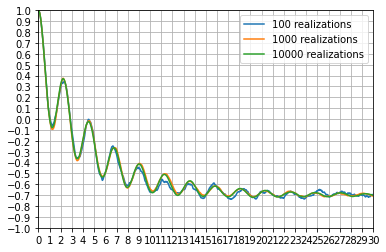

In [42]:
plt.plot(np.linspace(0, 30, 1500), sigma_zs_100, label="100 realizations")
plt.plot(np.linspace(0, 30, 1500), sigma_zs_1000, label="1000 realizations")
plt.plot(np.linspace(0, 30, 1500), sigma_zs_10000, label="10000 realizations")
plt.grid()
plt.xticks(np.linspace(0, 30, 31))
plt.yticks(np.linspace(-1, 1, 21))
plt.legend()
plt.xlim(0, 30)
plt.ylim(-1, 1)
plt.show()

In [43]:
with open("final/homps_low_T_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    ts = np.linspace(0, 30, 1500)
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_100[i])
        line += " " + str(sigma_zs_1000[i])
        line += " " + str(sigma_zs_10000[i]) + "\n"
        file.write(line)

## Convergence of the truncation threshhold $\epsilon$

In [44]:
eps_list = [1e-3, 1e-4, 1e-5]
eps_label_list = ['1e-3', '1e-4', '1e-5']
sigma_zs = []
average_bond_dims = []
max_bond_dims = []
for n, eps in enumerate(eps_list):
    print("eps =", eps)
    psis = np.squeeze([np.load("homps_low_T_eps_convergence/data/"+eps_label_list[n]+"/psi"+str(i)+".npy") for i in range(10000)])
    bond_dims = np.array([np.load("homps_low_T_eps_convergence/data/"+eps_label_list[n]+"/max_bond_dims"+str(i)+".npy") for i in range(10000)])

    sigma_zs.append(compute_exp_val_nonlinear(psis, sigma_z))
    max_bond_dims.append(np.mean(bond_dims, axis=0))
    
ts = np.linspace(0, 30, 1500)

eps = 0.001
eps = 0.0001
eps = 1e-05


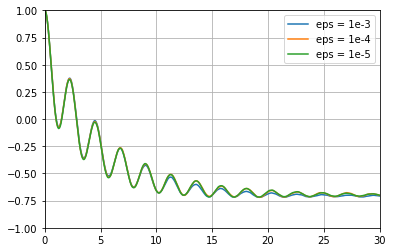

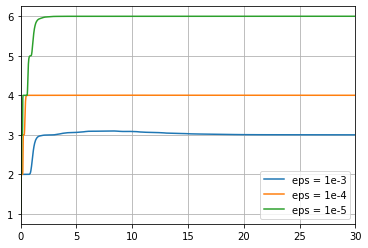

In [45]:
for n, eps in enumerate(eps_list):
    plt.plot(np.linspace(0, 30, 1500), sigma_zs[n], label="eps = "+eps_label_list[n])
plt.grid()
plt.legend()
plt.xlim(0, 30)
plt.ylim(-1, 1)
plt.show()

for n, eps in enumerate(eps_list):
    plt.plot(np.linspace(0, 30, 1500), np.squeeze(max_bond_dims[n]), label="eps = "+eps_label_list[n])
plt.grid()
plt.legend()
plt.xlim(0, 30)
plt.show()

In [46]:
with open("final/homps_low_T_eps_convergence.txt", "w+") as file:
    line = "t"
    labels = ["1em3", "1em4", "1em5"]
    for i in range(len(eps_list)):
        line += " sigma_zs_" + labels[i] + " max_bond_dim_" + labels[i]
    file.write(line + " \n")
    for n, t in enumerate(ts):
        line = str(t)
        for i in range(len(eps_list)):
            line += " " + str(sigma_zs[i][n])
            line += " " + str(max_bond_dims[i][0][n])
        file.write(line + " \n")

# 4.) Appendix: Rescaled vd. Default HOMPS

In [47]:
sigma_zs_rescaled = np.load("rescaling_homps/data/high_T_sigma_zs_rescaled.npy")
sigma_zs_default = np.load("rescaling_homps/data/high_T_sigma_zs_default.npy")

In [48]:
N_steps = 1000
taus = np.linspace(0, 30, N_steps)

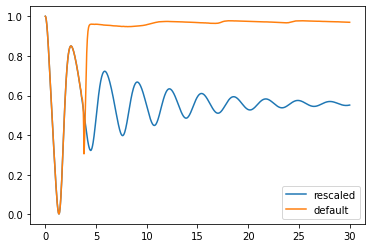

In [49]:
plt.plot(taus, sigma_zs_rescaled, label="rescaled")
plt.plot(taus, sigma_zs_default, label="default")
plt.legend()
plt.show()

In [50]:
with open("final/rescaled_homps_sigma_z.txt", "w+") as file:
    line = "t sigma_z_default sigma_z_rescaled"
    file.write(line + "\n")
    for i, t in enumerate(taus):
        line = str(t) + " " + str(sigma_zs_default[i]) + " " + str(sigma_zs_rescaled[i])
        file.write(line + "\n")

In [51]:
N_trunc = 40
N_steps = 1000
auxillary_magnitudes_default = np.empty((N_trunc, N_steps), dtype=complex)
auxillary_magnitudes_rescaled = np.empty((N_trunc, N_steps), dtype=complex)
for n in range(N_trunc):
    auxillary_magnitudes_default[n] = np.load(f"rescaling_homps/data/high_T_magnitudes_default_{n}.npy")
    auxillary_magnitudes_rescaled[n] = np.load(f"rescaling_homps/data/high_T_magnitudes_rescaled_{n}.npy")

In [52]:
taus = np.linspace(0, 30, N_steps)
colors = ['#fee0d2', '#ffdccd', '#ffd8c7', '#ffd4c2', '#ffd0bd', '#ffcbb8', '#ffc7b3', '#ffc3ae', '#ffbfa9', '#ffbba4', '#ffb69f', '#ffb29a', '#feae95', '#feaa90', '#fda68c', '#fda187', '#fc9d83', '#fb997e', '#fa957a', '#fa9175', '#f98c71', '#f8886c', '#f78468', '#f67f64', '#f47b60', '#f3775c', '#f27257', '#f16e53', '#ef694f', '#ee644b', '#ed6047', '#eb5b44', '#ea5640', '#e8513c', '#e64c38', '#e54634', '#e34131', '#e13b2d', '#e0342a', '#de2d26']

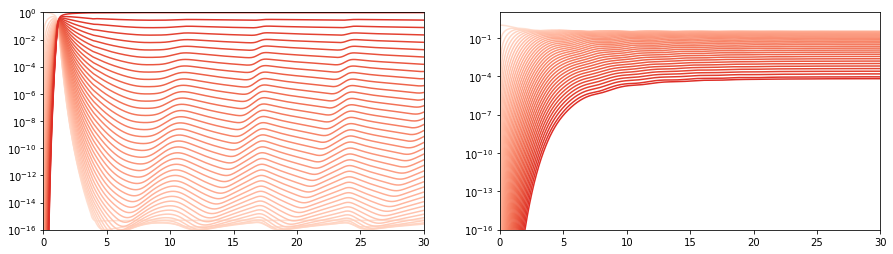

In [53]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
for n in range(N_trunc):
    axarray[0].plot(taus, np.real_if_close(auxillary_magnitudes_default[n]), color=colors[n])
    axarray[1].plot(taus, np.real_if_close(auxillary_magnitudes_rescaled[n]), color=colors[n])
axarray[0].set_yscale("log")
axarray[1].set_yscale("log")
axarray[0].set_ylim(1e-16, 1)
axarray[1].set_ylim(1e-16, 1)
axarray[0].set_xlim(0, 30)
axarray[1].set_xlim(0, 30)
plt.ylim(10**-16, 10**1)
plt.show()

In [54]:
with open("final/auxillary_magnitudes_default.txt", "w+") as file:
    line = "t"
    for n in range(N_trunc):
        line += " " + str(n)
    file.write(line + "\n")
    for i in range(0, N_steps, 5):
        line = str(taus[i])
        for n in range(N_trunc):
            line += " " + str(np.real_if_close(auxillary_magnitudes_default[n][i]))
        file.write(line + "\n")

In [55]:
with open("final/auxillary_magnitudes_rescaled.txt", "w+") as file:
    line = "t"
    for n in range(N_trunc):
        line += " " + str(n)
    file.write(line + "\n")
    for i in range(0, N_steps, 5):
        line = str(taus[i])
        for n in range(N_trunc):
            line += " " + str(np.real_if_close(auxillary_magnitudes_rescaled[n][i]))
        file.write(line + "\n")